In [1]:
%pip install -Uqq fastai gradio nbdev

In [ ]:
from fastai.vision.all import *

In [ ]:
from fastai.vision.all import load_learner
import gradio as gr

In [6]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Snake Recognizer Project


Mounted at /content/drive
/content/drive/My Drive/Snake Recognizer Project


In [7]:
model = load_learner('models/snake-recognizer-v0.pkl')

In [8]:
snake_labels = (
    "Monocled cobra",
    "Egyptian cobra",
    "Black-necked spitting cobra",
    "Samar cobra",
    "Red spitting cobra",
    "Javan spitting cobra",
    "Spectacled cobra",
    "Russell's viper",
    "Horned vipers",
    "Bush vipers",
    "Eyelash viper",
    "Saw-scaled vipers",
    "Banded krait",
    "Black mamba",
    "Inland taipan",
    "Eastern brown snake",
    "Rattle snake",
    "King cobra"
)

def recognize_snake(photo):
  pred, idx, probs = model.predict(photo)
  return dict(zip(snake_labels, map(float, probs)))

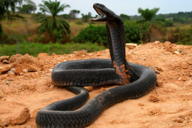

In [10]:
img = PILImage.create(f'test data/black-necked-spitting-cobra-naja-nigricollis-wklein.jpg')
img.thumbnail((192,192))
img

In [11]:
recognize_snake(img)

{'Monocled cobra': 1.1163722774654161e-05,
 'Egyptian cobra': 0.01258796826004982,
 'Black-necked spitting cobra': 0.9777340292930603,
 'Samar cobra': 3.01445834338665e-05,
 'Red spitting cobra': 2.3122642232920043e-05,
 'Javan spitting cobra': 0.0005188836948946118,
 'Spectacled cobra': 0.00015094962145667523,
 "Russell's viper": 9.27890941966325e-05,
 'Horned vipers': 9.545711509417742e-05,
 'Bush vipers': 0.0009361603297293186,
 'Eyelash viper': 0.0003364287840668112,
 'Saw-scaled vipers': 6.700432277284563e-05,
 'Banded krait': 0.00015121301112230867,
 'Black mamba': 0.0050192344933748245,
 'Inland taipan': 7.476512109860778e-05,
 'Eastern brown snake': 0.0020968415774405003,
 'Rattle snake': 8.099497790681198e-06,
 'King cobra': 6.572777056135237e-05}

In [15]:
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = [
    'test data/viper-2.jpg',
    'test data/shutterstock_2062214282-edited-1-scaled.jpg',
    'test data/Hornviper_Cerastes_cerastes.jpg',
    'test data/download (3).jpg',
    'test data/download (4).jpg',
    'test data/Bothriechis_schlegelii_(La_Selva_Biological_Station).jpg',
    'test data/Naja_sputatrix.jpg',
    'test data/download (6).jpg',
    'test data/download.jpg'
    ]

iface = gr.Interface(fn=recognize_snake, inputs=image, outputs=label, examples=examples)
iface.launch(inline=False,share=True)

<ipython-input-15-5c2c720474bc>:1: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image = gr.inputs.Image(shape=(192,192))
<ipython-input-15-5c2c720474bc>:1: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image = gr.inputs.Image(shape=(192,192))
<ipython-input-15-5c2c720474bc>:2: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label()
<ipython-input-15-5c2c720474bc>:2: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label()


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://6a9b80fbd65c303307.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
from nbdev.export import notebook2script

In [ ]:
notebook2script('app.ipynb')